In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from math import exp

In [3]:
test_frame=wb.DataReader("RELIANCE.NS","yahoo","1/1/2015","2/2/2019")
#n=7

In [4]:
#test_frame.loc["2015-1-1":f"2015-1-{n+5}"]
#test_frame["Rolling_Maximum"]=test_frame.rolling(f'{n}d')['Adj Close'].max()
#test_frame["Rolling_Minimum"]=test_frame.rolling(f'{n}d')['Adj Close'].min()
#test_frame["Rolling_Maximum1"]=test_frame.rolling('14d')['Adj Close'].max()
#test_frame["Rolling_Minimum2"]=test_frame.rolling('14d')['Adj Close'].min()


In [5]:
#test_frame.head(8)
#a,b=test_frame["Adj Close"].nsmallest(2)
#a
#b

In [6]:
#df=test_frame.loc["2015-1-1":f"2015-1-10"]
#a,b=df["Adj Close"].nlargest(2)

In [7]:
#df1 = test_frame[(test_frame.index > '2017-08-10') & (test_frame.index <= '2017-08-17')]
#df1["Adj Close"].nlargest(2)

In [8]:
n_slow=26#The longer period
n_fast=12#The shorter period

In [37]:
portfolio=1e5
tscost=0.005
nstocks=0

stock_list=["RELIANCE.NS","ITC.NS","LUPIN.NS","BHEL.NS","IBVENTURES.NS"]

for s in stock_list:
    nstocks+=1

#print(nstocks)

In [11]:
def get_dataframes(stock,n):
    stocks.append(wb.DataReader(stock,"yahoo",start="1/1/2015"))

In [12]:
def MACD(df,nslow,nfast):
    for i in range(len(df)):
        df1=df["Adj Close"]
        
        EWM_slow=df1.ewm(span=nslow,adjust=False).mean()
        EWM_fast=df1.ewm(span=nfast,adjust=False).mean()
        
        df[f"MACD_{nfast}_{nslow}"]=EWM_fast-EWM_slow
        
    return df

def MACD_Signal(df,nslow,nfast):
    for i in range(len(df)):
        df1=df[f"MACD_{nfast}_{nslow}"]
        df[f"MACDsignal_{nfast}_{nslow}"]=df1.ewm(span=9,adjust=False).mean()
        
    return df

def MACD_Diff(df,nslow,nfast):
    for i in range(len(df)):
        df[f"MACD_Diff_{nfast}_{nslow}"]=df[f"MACD_{nfast}_{nslow}"]-df[f"MACDsignal_{nfast}_{nslow}"]
    return df

In [13]:
#0 stands for no posn
#1 stands for long
#-1 stands for short
"""
def MACD_crossover_stratergy(df):
    for row in range(len(df)):
        if(df["Position"].iloc[row-1]==0):
            if(df[f"MACD_{n_fast}_{n_slow}"].iloc[row])>(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row]) and (df[f"MACD_{n_fast}_{n_slow}"].iloc[row-1])<(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row-1]):
                df["Position"].iloc[row]=1
            if(df[f"MACD_{n_fast}_{n_slow}"].iloc[row])<(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row]) and (df[f"MACD_{n_fast}_{n_slow}"].iloc[row-1])>(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row-1]):
                df["Position"].iloc[row]=-1
        elif(df["Position"].iloc[row-1]==1):
            if(df[f"MACD_{n_fast}_{n_slow}"].iloc[row])<(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row]) and (df[f"MACD_{n_fast}_{n_slow}"].iloc[row-1])>(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row-1]):
                df["Position"].iloc[row]=0
            else:
                df["Position"].iloc[row]=1
        else:
            if(df[f"MACD_{n_fast}_{n_slow}"].iloc[row])>(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row]) and (df[f"MACD_{n_fast}_{n_slow}"].iloc[row-1])<(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row-1]):
                df["Position"].iloc[row]=0
            else:
                df["Position"].iloc[row]=-1
    return df
    """

'\ndef MACD_crossover_stratergy(df):\n    for row in range(len(df)):\n        if(df["Position"].iloc[row-1]==0):\n            if(df[f"MACD_{n_fast}_{n_slow}"].iloc[row])>(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row]) and (df[f"MACD_{n_fast}_{n_slow}"].iloc[row-1])<(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row-1]):\n                df["Position"].iloc[row]=1\n            if(df[f"MACD_{n_fast}_{n_slow}"].iloc[row])<(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row]) and (df[f"MACD_{n_fast}_{n_slow}"].iloc[row-1])>(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row-1]):\n                df["Position"].iloc[row]=-1\n        elif(df["Position"].iloc[row-1]==1):\n            if(df[f"MACD_{n_fast}_{n_slow}"].iloc[row])<(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row]) and (df[f"MACD_{n_fast}_{n_slow}"].iloc[row-1])>(df[f"MACDsignal_{n_fast}_{n_slow}"].iloc[row-1]):\n                df["Position"].iloc[row]=0\n            else:\n                df["Position"].iloc[row]=1\n        else:\n            if(df

In [28]:
"""
The pivot indicator used simply has a lookback period.It will look back a historical candle 
and check whether it was the highest high or lowest low both before and after
it and will return the lows and highs over some period of time
FOR EX(What I have used)-:

Go back by 28 days and look for 7 days before this lookback day and 7 days after this
Find the highest and lowest value in this interval(today-35days,today-21days)

Again,Go back by 14 days and look for 7 days before and after this lookback day
Find the highest and Lowest in this interval(today-21days,today-7days) again.

This will(probably) help getting the previous two lows and previous two highs for a given
data which will be helpful as we compare the two most recent highs and lows in MACD and
close price for looking at trading signals generated by MACD Divergence.
"""
def pivots(df,time_period):
    df["low_close_1"]=0
    df["low_close_2"]=0
    df["high_close_1"]=0
    df["high_close_2"]=0
    df["low_MACD_1"]=0
    df["low_MACD_2"]=0
    df["high_MACD_1"]=0
    df["high_MACD_2"]=0
    df["Diff_Low_Close"]=0
    df["Diff_High_Close"]=0
    df["Diff_Low_MACD"]=0
    df["Diff_High_MACD"]=0
    for i in range(len(df)):
        today=df.index[i]
        df1=df[(df.index>today-pd.to_timedelta(28+time_period, unit='d'))&(df.index<today-pd.to_timedelta(28-time_period,unit="d"))]
        df["low_close_1"].iloc[i]=df1["Adj Close"].min()
        df["high_close_1"].iloc[i]=df1["Adj Close"].max()
        df["low_MACD_1"].iloc[i]=df1[f"MACD_{n_fast}_{n_slow}"].min()
        df["high_MACD_1"].iloc[i]=df1[f"MACD_{n_fast}_{n_slow}"].max()
        df2=df[(df.index>today-pd.to_timedelta(14+time_period, unit='d'))&(df.index<today-pd.to_timedelta(14-time_period,unit="d"))]
        df["low_close_2"].iloc[i]=df2["Adj Close"].min()
        df["high_close_2"].iloc[i]=df2["Adj Close"].max()
        df["low_MACD_2"].iloc[i]=df2[f"MACD_{n_fast}_{n_slow}"].min()
        df["high_MACD_2"].iloc[i]=df2[f"MACD_{n_fast}_{n_slow}"].max()
        
        df["Diff_Low_Close"].iloc[i]=df["low_close_2"].iloc[i]-df["low_close_1"].iloc[i]
        df["Diff_High_Close"].iloc[i]=df["high_close_2"].iloc[i]-df["high_close_1"].iloc[i]
        df["Diff_Low_MACD"].iloc[i]=df["low_MACD_2"].iloc[i]-df["low_MACD_1"].iloc[i]
        df["Diff_Low_Close"].iloc[i]=df["low_MACD_2"].iloc[i]-df["low_MACD_1"].iloc[i]
    df.dropna()
    return df

In [29]:
"""
def MACD_Divergence_Stratergy(df):
    for row in range(len(df)):
        if(df["Position"].iloc[row-1]==0):
            if(df["low_MACD_1"].iloc[row])>(df["low_MACD_2"].iloc[row]) and (df["low_close_1"].iloc[row])<(df["low_close_2"].iloc[row]):
                df["Position"].iloc[row]=-1
            if(df["low_MACD_1"].iloc[row])<(df["low_MACD_2"].iloc[row]) and (df["low_close_1"].iloc[row])>(df["low_close_2"].iloc[row]):
                df["Position"].iloc[row]=1
        elif(df["Position"].iloc[row-1]==1):
            if(df["low_MACD_1"].iloc[row])>(df["low_MACD_2"].iloc[row]) and (df["low_close_1"].iloc[row])<(df["low_close_2"].iloc[row]):
                df["Position"].iloc[row]=0
            else:
                df["Position"].iloc[row]=1
        else:
            if(df["low_MACD_1"].iloc[row])<(df["low_MACD_2"].iloc[row]) and (df["low_close_1"].iloc[row])>(df["low_close_2"].iloc[row]):
                df["Position"].iloc[row]=0
            else:
                df["Position"].iloc[row]=-1
    return df
    """

'\ndef MACD_Divergence_Stratergy(df):\n    for row in range(len(df)):\n        if(df["Position"].iloc[row-1]==0):\n            if(df["low_MACD_1"].iloc[row])>(df["low_MACD_2"].iloc[row]) and (df["low_close_1"].iloc[row])<(df["low_close_2"].iloc[row]):\n                df["Position"].iloc[row]=-1\n            if(df["low_MACD_1"].iloc[row])<(df["low_MACD_2"].iloc[row]) and (df["low_close_1"].iloc[row])>(df["low_close_2"].iloc[row]):\n                df["Position"].iloc[row]=1\n        elif(df["Position"].iloc[row-1]==1):\n            if(df["low_MACD_1"].iloc[row])>(df["low_MACD_2"].iloc[row]) and (df["low_close_1"].iloc[row])<(df["low_close_2"].iloc[row]):\n                df["Position"].iloc[row]=0\n            else:\n                df["Position"].iloc[row]=1\n        else:\n            if(df["low_MACD_1"].iloc[row])<(df["low_MACD_2"].iloc[row]) and (df["low_close_1"].iloc[row])>(df["low_close_2"].iloc[row]):\n                df["Position"].iloc[row]=0\n            else:\n             

In [34]:
"""

This is the best stratergy as far as MACD is concerned where we combine both crossover and divergence to get
better results(accuracy) on the market data.
Long: When bullish divergence and a signal cross up is detected
Short: When bearish divergence and a signal cross down is detected
Exit Long: When bearish divergence or a signal cross down is detected
Exit Short: When bullish divergence or a signal cross down is detected

"""
def MACD_Cross_Div_Stratergy(df):
    df["Position"]=0
    for row in range(len(df)):
        if(df["Position"].iloc[row-1]==0):
            if(((df[f"MACD_Diff_{n_fast}_{n_slow}"].iloc[row]>0)&(df[f"MACD_Diff_{n_fast}_{n_slow}"].iloc[row-1]<0))&((df["Diff_Low_Close"].iloc[row]>0)&(df["Diff_Low_MACD"].iloc[row]<0))):
                df["Position"].iloc[row]=1
            if(((df[f"MACD_Diff_{n_fast}_{n_slow}"].iloc[row]<0)&(df[f"MACD_Diff_{n_fast}_{n_slow}"].iloc[row-1]>0))&((df["Diff_Low_Close"].iloc[row]<0)&(df["Diff_Low_MACD"].iloc[row]>0))):
                df["Position"].iloc[row]=-1
        if(df["Position"].iloc[row-1]==1):
            if(((df[f"MACD_Diff_{n_fast}_{n_slow}"].iloc[row]<0)&(df[f"MACD_Diff_{n_fast}_{n_slow}"].iloc[row-1]>0))or((df["Diff_Low_Close"].iloc[row]<0)&(df["Diff_Low_MACD"].iloc[row]>0))):
                df["Position"].iloc[row]=0
            else:
                df["Position"].iloc[row]=1
        else:
            if(((df[f"MACD_Diff_{n_fast}_{n_slow}"].iloc[row]>0)&(df[f"MACD_Diff_{n_fast}_{n_slow}"].iloc[row-1]<0))or((df["Diff_Low_Close"].iloc[row]>0)&(df["Diff_Low_MACD"].iloc[row]<0))):
                df["Position"].iloc[row]=0
            else:
                df["Position"].iloc[row]=-1
    return df

In [35]:
i=0
stocks=[]
for ticker in stock_list:
    get_dataframes(ticker,i)
    MACD(stocks[i],n_slow,n_fast)
    MACD_Signal(stocks[i],n_slow,n_fast)
    MACD_Diff(stocks[i],n_slow,n_fast)
    pivots(stocks[i],7)
    MACD_Cross_Div_Stratergy(stocks[i])
    i+=1

C:\Users\Ayush\Anaconda2019\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Ayush\Anaconda2019\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Ayush\Anaconda2019\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value

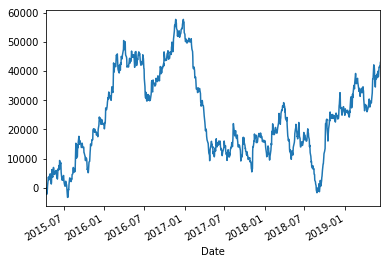

In [38]:
s = (len(stocks[0]),nstocks)
#setting the dimensions of the weights vector depending on the available data points
#Date=rows
#Stock_name=columns
weights = np.zeros(s) 


for row in range(len(stocks[0])):
    i = 0
    sumwts = 0
    for i in range(nstocks):
        sumwts+=np.abs(stocks[i]['Position'].iloc[row]) 
        #checking how many positions were taken on that day
    for i in range(nstocks):
        if sumwts>0:
            #weights assigned as:
            #weights = (portfolio*position)/(no.of positions * adj close on that day * (1+transac cost))
            weights[row][i]=(portfolio*stocks[i]['Position'].iloc[row])/((sumwts*stocks[i]['Adj Close'].iloc[row])*(1+tscost))
        else:
            weights[row][i]=0
i = 0


for i in range(nstocks):
    stocks[i]['Market Return'] = (stocks[i]['Adj Close'] - stocks[i]['Adj Close'].shift(1)) #Absolute market return

    
#Calculating portfolio return
stocks[0]['Strategy Return']=0
i = 0
for i in range(nstocks):
    stocks[0]['Strategy Return']+=stocks[i]['Market Return'] * weights[:,i] #multiplying market return of each
                                                                            #ticker with its weight
stocks[0]['Strategy Return'][64:].cumsum().plot() #Plotting strategy return

In [39]:
weights

array([[ -47.82773133,  -90.78107176,  -14.22159638, -118.84569639,
        -988.53579938],
       [ -47.95465289,  -90.49786318,  -14.19081484, -115.93173738,
        -961.93088853],
       [ -48.4857506 ,  -90.1428432 ,  -14.21065623, -116.736994  ,
        -955.99090809],
       ...,
       [ -15.08584857,  -71.22583374,  -27.3527563 , -291.79616427,
         -68.94334985],
       [ -14.9723486 ,  -71.11129919,  -27.31333815, -285.51647609,
         -71.08589621],
       [ -14.89948501,  -71.28962188,  -27.52489282, -290.73043681,
         -73.89713485]])